### High Dimensional Visualization with SVD (in progress)

In [1]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cross_validation import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as sk

import pandas as pd
# from collections import Counter
import numpy as np
import nltk

import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

In [2]:
# read in data from 01-Ingest
modern = pd.read_pickle('data/cards_modern_no_name.pkl')

# binarize the color column
modern['bincolor'] = pd.Categorical.from_array(modern.colors).codes

# take a peek
modern[['colors', 'bincolor', 'text']].head()

,colors,bincolor,text
0,Black,0,"Flying Whenever This deals damage to a player,..."
1,Blue,1,Flying
2,Black,0,You draw three cards and you lose 3 life.
3,Red,3,"{1}, Tap : This deals 1 damage to target creat..."
4,White,4,"Flying When This enters the battlefield, you g..."


In [3]:
from sklearn.decomposition import TruncatedSVD

# set target values 
y = modern.bincolor

# intilitize the vectorizer
vectorizer = CountVectorizer()
# fit the vectorizer on just the text column
X = vectorizer.fit_transform(modern.text)

# initilize the SVD
svd = TruncatedSVD(n_components=2, random_state=42)
# transoform X into its top two components
X = svd.fit_transform(X) 

#### Ploting the first two eigenvectors 

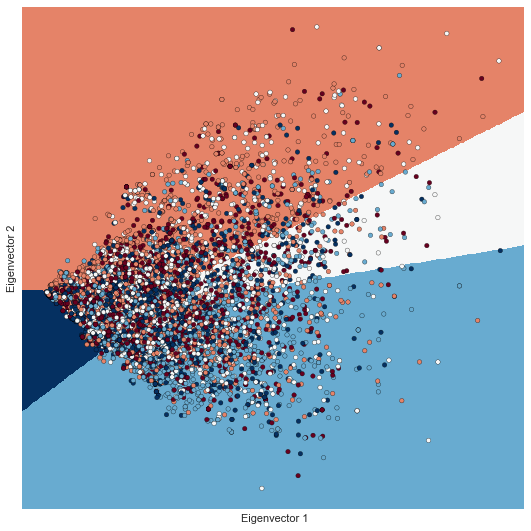

In [10]:

# adapted from http://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html
clf = LogisticRegression(C=2)
clf.fit(X, y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].

h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(9, 9))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.RdBu)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.RdBu)
plt.xlabel('Eigenvector 1')
plt.ylabel('Eigenvector 2')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

#### Visualization is not very clear

In the words of Alex Jansen:
<img src="data/images/alex.png" />

Lets see how much signal is still in the first two eigenvectors

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.15, random_state=42)

clf = LogisticRegression(C=1)

acc = cross_val_score(clf, X_train, y_train,
                       cv=10, scoring='accuracy') 

print "Accuracy: %s" % acc.mean().round(3)

Accuracy: 0.265


Not much singnal at all in the first two eigenvectors.

Best model was 68.8% accurate, this is 26.1% accurate at predicting color from text.

Cant visualize signal thats not there. 

#### Lets look at the top 9 eigenvectors

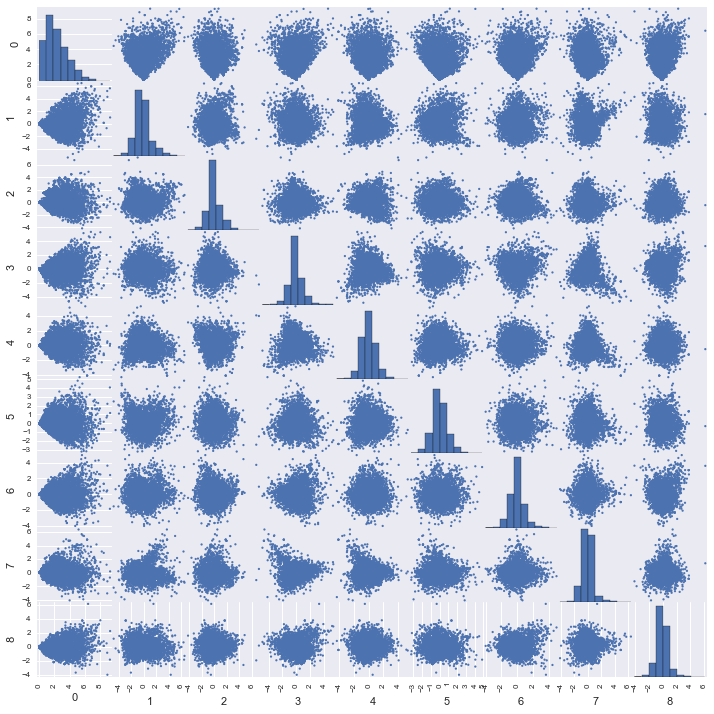

In [14]:
# scatter matrix of first 9 eigenvectors 

y = modern.bincolor

X = vectorizer.fit_transform(modern.text)

svd = TruncatedSVD(n_components=9, random_state=42)

X = svd.fit_transform(X) 

df = pd.DataFrame(X, y)

pd.scatter_matrix(df, figsize=(12, 12), edgecolor='none', alpha=1);

In [16]:
# confustion matrix of first 9 eigenvectors

# plot code adapted from http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

def plot_confusion_matrix(cm, title='Logistic Confusion matrix', cmap=plt.cm.Blues):
    label = ["Black", "Blue", "Green", "Red", "White"]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    tick_marks = np.arange(len(label))
    plt.xticks(tick_marks, label, rotation=45)
    plt.yticks(tick_marks, label)    
    plt.title(title)
    plt.colorbar()
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

      1 eigenvector confusion matrix


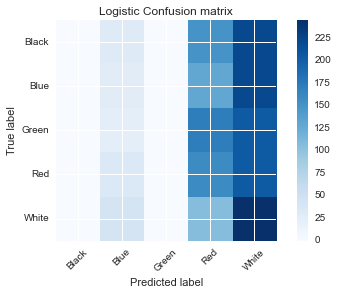

      3 eigenvector confusion matrix


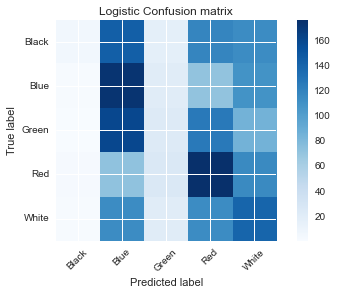

      5 eigenvector confusion matrix


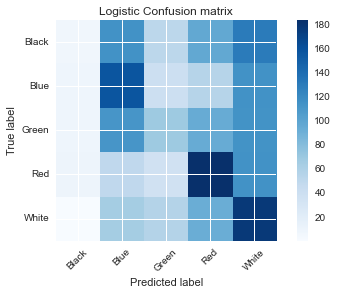

      7 eigenvector confusion matrix


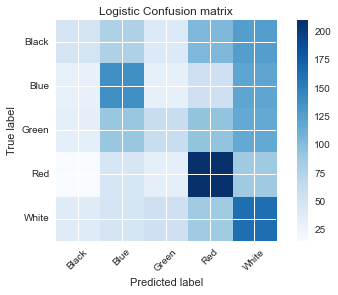

      9 eigenvector confusion matrix


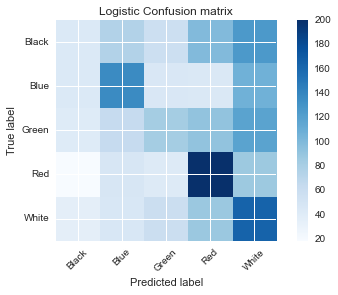

      11 eigenvector confusion matrix


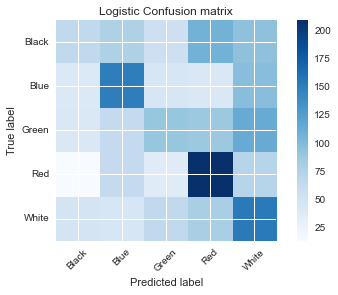

      13 eigenvector confusion matrix


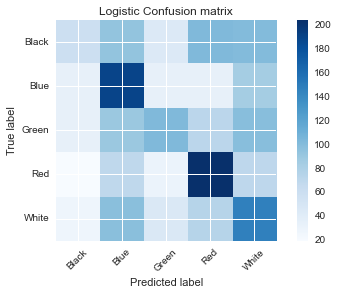

      15 eigenvector confusion matrix


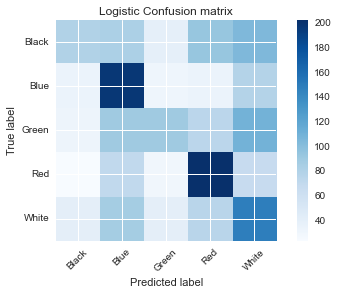

      17 eigenvector confusion matrix


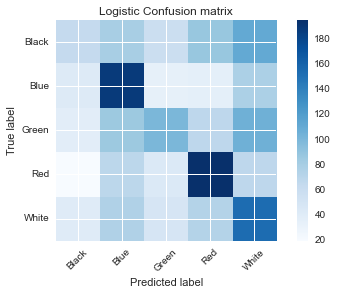

      19 eigenvector confusion matrix


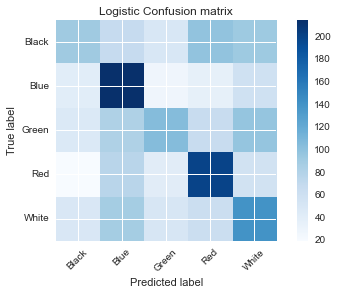

In [17]:
# value of eigenvectors 

# value of first two eigenvectors 

def plotcm(n):
    X = vectorizer.fit_transform(modern.text)
    svd = TruncatedSVD(n_components=n, random_state=42)
    X = svd.fit_transform(X) 
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
    clf = LogisticRegression(C=2)
    clf.fit(X_train, y_train)
    cm = sk.confusion_matrix(y_test, clf.predict(X_test))
    print "     ", n, "eigenvector confusion matrix"
    plot_confusion_matrix(cm)  
    plt.show();

for n in xrange(1, 20, 2):
    plotcm(n)  
    plt.show();

As the number of eigenvectors increase, you can see the model start to be able to descriminate colors.

### Ok, no more SVD